# Lecture 11.1 : Graphs

## Introduction

- A graph is a set of vertices connected by pairwise edges.  
- Here is an example graph:

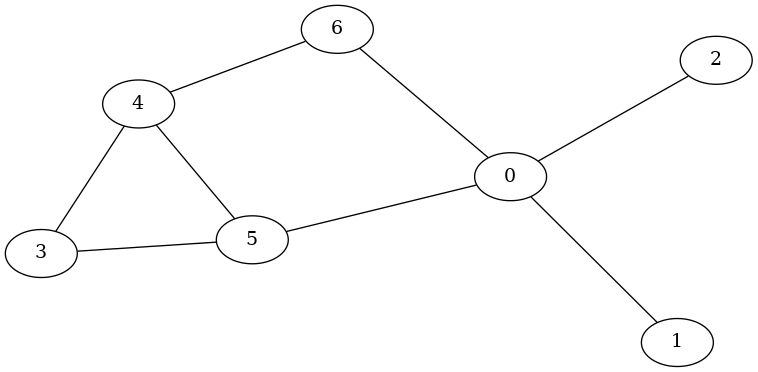

- Our graphs are undirected i.e. edges can be traversed in both directions. (In a directed graph edges have an associated direction.)
- A set of vertices forms a *connected component* in an undirected graph if any vertex from the set can be reached from every other vertex by traversing edges.
- Below is another example graph. This one has three connected components:

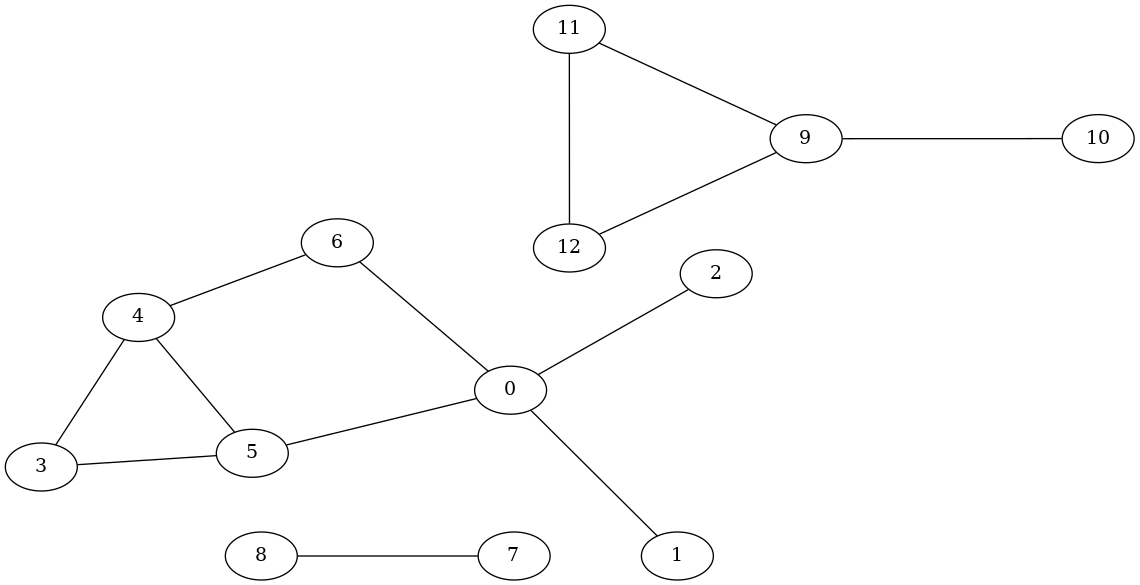

- Graphs have thousands of practical applications i.e. we can apply
  the graph abstraction to model thousands of real-world problems.  
- TODO: Can you think of any?


- If modeling a omputer network, the vertices would represent routers/end devices, and the edges would represetn ethernet cables/fiber optic cables
- If modelling a social network, the vertices would represent people, the edges would represent relationships
- If modelling a road network, the vertices would represent cities, the edges would be moterways
- If modelling a an ait transport network the vertices would be airports, the edges would be flights
    - Is there a direct flight from new york to san fransisco?
    - What is the shortest path to san fransisco from new york?
    - what is the cheapest path from san fransisco to new york?
    - Which airport has the most connections to other airports?

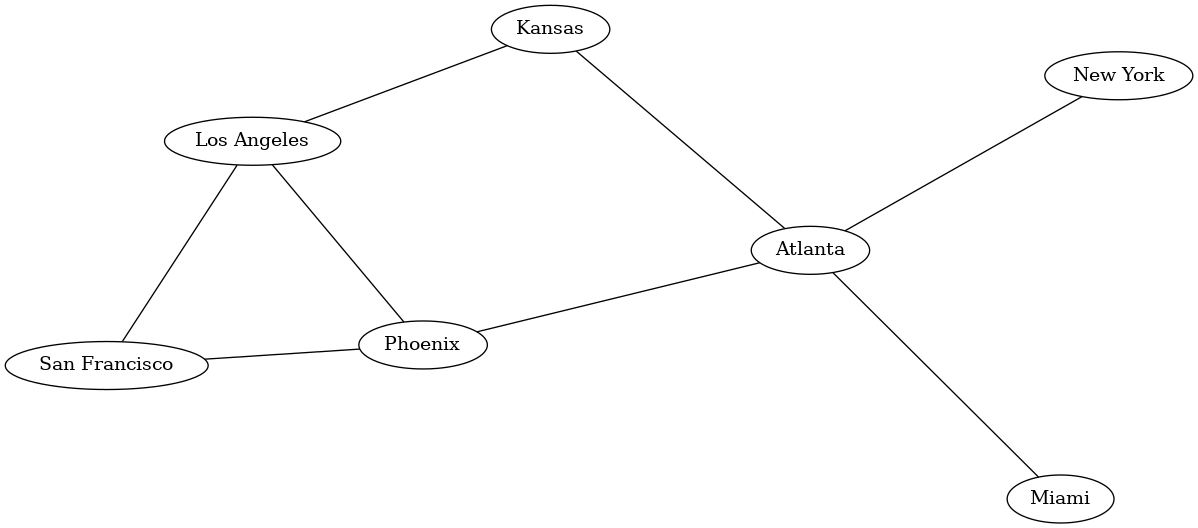

- A *path* is a sequence of vertices connected by edges.  
- A *cycle* is a path whose first and last vertices are the same.
- In the Travelling Salesman Problem we seek a cycle that visits every vertex in the graph exactly once.  
- An understanding of and an ability to apply graph algorithms will
  make you a good programmer.
- We first consider how to represent a graph in Python and then examine
  a small number of graph algorithms (there are hundreds).

## Graph description

- We will describe a graph with a simple text file where the first line
  defines the number of vertices in the graph and the following lines
  define the edges (i.e. which vertices are connected to which)  
- The first graph given above is then described by the following text file.  

```text
$ cat graph01.txt
7
0 1
0 2
0 5
0 6
3 4
3 5
4 5
4 6
```


In [3]:
# Let's create our text file
with open('graph01.txt', 'w') as f:
  f.write('7\n')
  f.write('0 1\n')
  f.write('0 2\n')
  f.write('0 5\n')
  f.write('0 6\n')
  f.write('3 4\n')
  f.write('3 5\n')
  f.write('4 5\n')
  f.write('4 6\n')

In [ ]:
!cat graph01.txt

## Graph representation

- How are we going to represent a graph in Python?  
- We will do so by developing a Graph class.  
- The vertices can be represented simply by integers.  
- If there are *V* vertices in the graph we will number them *0* to *V-1*.  
- What about the edges? How are we going to capture which vertices are
  connected to which?  
- To capture information about edges we will use an *adjacency-list*
  representation.  
- This will involve a dictionary called *adj* which maps from vertex
  number (dictionary keys) to a list of vertices connected to that
  vertex (dictionary values).

## Python implementation

In [6]:
# TODO: Write the Graph class
class Graph(object):
    def __init__(self, V) -> None:
        self.V = V
        self.adj = {}
        for v in range(self.V):
            self.adj[v] = list()

    def addEdge(self, v, w):
        self.adj[v].append(w)
        self.adj[w].append(v)


## Initialising our graph

- Below we initialise a graph based on its text description.  

In [7]:
# TODO: Initialise a Graph instance
with open('graph01.txt', 'r') as f:
    V = int(f.readline().strip())
    g = Graph(V)

    for line in f:
        v, w = [int(t) for t in line.strip().split()]
        g.addEdge(v, w)

print(g.V)
print(g.adj)

7
{0: [1, 2, 5, 6], 1: [0], 2: [0], 3: [4, 5], 4: [3, 5, 6], 5: [0, 3, 4], 6: [0, 4]}




## Computing the degree of a vertex

- The degree of a vertex is the number of edges connecting it.  
- Let’s add a method to our Graph class to return the degree of
any vertex v.  

In [8]:
# TODO: Add a degree method
class Graph(object):
    def __init__(self, V) -> None:
        self.V = V
        self.adj = {}
        for v in range(self.V):
            self.adj[v] = list()

    def addEdge(self, v, w):
        self.adj[v].append(w)
        self.adj[w].append(v)

    def degree(self, v):
        return len(self.adj[v])

In [9]:
# TODO: Test our new method
with open('graph01.txt', 'r') as f:
    V = int(f.readline().strip())
    g = Graph(V)

    for line in f:
        v, w = [int(t) for t in line.strip().split()]
        g.addEdge(v, w)

print(g.V)
print(g.adj)
print(g.degree(0))
print(g.degree(1))



7
{0: [1, 2, 5, 6], 1: [0], 2: [0], 3: [4, 5], 4: [3, 5, 6], 5: [0, 3, 4], 6: [0, 4]}
4
1




## Computing the maximum degree

- Let’s add a method to our Graph class to return the maximum degree
of all vertices.  

In [1]:
# TODO: Add a maximum degree method
class Graph(object):
    def __init__(self, V) -> None:
        self.V = V
        self.adj = {}
        for v in range(self.V):
            self.adj[v] = list()

    def addEdge(self, v, w):
        self.adj[v].append(w)
        self.adj[w].append(v)

    def degree(self, v):
        return len(self.adj[v])

    def max_degree(self, v):
        return max(self.adj[v])

In [2]:
# TODO: Test our new method
with open('graph01.txt', 'r') as f:
    V = int(f.readline().strip())
    g = Graph(V)

    for line in f:
        v, w = [int(t) for t in line.strip().split()]
        g.addEdge(v, w)

print(g.V)
print(g.adj)
print(g.degree(0))
print(g.degree(1))
print(g.max_degree(0))
print(g.max_degree(5))

7
{0: [1, 2, 5, 6], 1: [0], 2: [0], 3: [4, 5], 4: [3, 5, 6], 5: [0, 3, 4], 6: [0, 4]}
4
1
6
4




## Computing the average degree

- Let’s add a method to our Graph class to return the average degree
of all vertices.  

In [17]:
# TODO: Add an average degree method
class Graph(object):
    def __init__(self, V) -> None:
        self.V = V
        self.adj = {}
        for v in range(self.V):
            self.adj[v] = list()

    def addEdge(self, v, w):
        self.adj[v].append(w)
        self.adj[w].append(v)

    def degree(self, v):
        return len(self.adj[v])

    def max_degree(self, v):
        return max(self.adj[v])

    def average_degree(self, v):
        total = 0
        for i in self.adj[v]:
            value = i
            total += value
        average = total / len(self.adj[v])
        return average

In [18]:
# TODO: Test our new method
with open('graph01.txt', 'r') as f:
    V = int(f.readline().strip())
    g = Graph(V)

    for line in f:
        v, w = [int(t) for t in line.strip().split()]
        g.addEdge(v, w)

print(g.V)
print(g.adj)
print(g.degree(0))
print(g.degree(1))
print(g.max_degree(0))
print(g.max_degree(5))
print(g.average_degree(0))
print(g.average_degree(6))

7
{0: [1, 2, 5, 6], 1: [0], 2: [0], 3: [4, 5], 4: [3, 5, 6], 5: [0, 3, 4], 6: [0, 4]}
4
1
6
4
3.5
2.0
